In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#pd.set_option('max_columns', None)
import warnings
warnings.filterwarnings('ignore')

C:\Users\sumit\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\sumit\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\sumit\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
data = pd.read_csv('HDHI Admission data.csv')
data

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,...,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1,234735,4/1/2017,4/3/2017,81,M,R,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
1,2,234696,4/1/2017,4/5/2017,65,M,R,E,Apr-17,5,...,0,0,0,0,0,0,0,0,0,0
2,3,234882,4/1/2017,4/3/2017,53,M,U,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
3,4,234635,4/1/2017,4/8/2017,67,F,U,E,Apr-17,8,...,0,0,0,0,0,0,0,0,0,0
4,5,234486,4/1/2017,4/23/2017,60,F,U,E,Apr-17,23,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,15753,699585,31/03/2019,04/04/2019,86,F,U,O,Mar-19,5,...,0,0,0,0,0,0,0,0,0,0
15753,15754,699500,3/31/2019,4/1/2019,50,M,R,E,Mar-19,2,...,0,0,0,0,0,0,0,0,0,0
15754,15755,700415,31/03/2019,09/04/2019,82,M,U,E,Mar-19,10,...,0,0,0,0,0,0,0,0,0,0
15755,15756,699524,31/03/2019,03/04/2019,59,F,U,O,Mar-19,4,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data.columns

Index(['SNO', 'MRD No.', 'D.O.A', 'D.O.D', 'AGE', 'GENDER', 'RURAL',
       'TYPE OF ADMISSION-EMERGENCY/OPD', 'month year', 'DURATION OF STAY',
       'duration of intensive unit stay', 'OUTCOME', 'SMOKING ', 'ALCOHOL',
       'DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD', 'HB', 'TLC', 'PLATELETS',
       'GLUCOSE', 'UREA', 'CREATININE', 'BNP', 'RAISED CARDIAC ENZYMES', 'EF',
       'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA', 'ACS', 'STEMI',
       'ATYPICAL CHEST PAIN', 'HEART FAILURE', 'HFREF', 'HFNEF', 'VALVULAR',
       'CHB', 'SSS', 'AKI', 'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT',
       'CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC',
       'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK', 'SHOCK',
       'PULMONARY EMBOLISM', 'CHEST INFECTION'],
      dtype='object')

In [4]:
len(data.columns)

56

In [5]:
disease_columns = [
    'DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD', 'RAISED CARDIAC ENZYMES',
    'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA', 'ACS', 'STEMI', 
    'ATYPICAL CHEST PAIN', 'HEART FAILURE', 'HFREF', 'HFNEF', 'VALVULAR', 
    'CHB', 'SSS', 'AKI', 'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT', 
    'CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC',
    'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK', 'SHOCK', 
    'PULMONARY EMBOLISM', 'CHEST INFECTION'
]


In [6]:
disease_values = data[disease_columns]
disease_values

,DM,HTN,CAD,PRIOR CMP,CKD,RAISED CARDIAC ENZYMES,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,ACS,...,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,1,1,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
15753,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15754,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
15755,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
print(data['GENDER'].value_counts())
print(data['RURAL'].value_counts())
print(data['TYPE OF ADMISSION-EMERGENCY/OPD'].value_counts())
print(data['OUTCOME'].value_counts())

M    9990
F    5767
Name: GENDER, dtype: int64
U    12077
R     3680
Name: RURAL, dtype: int64
E    10924
O     4833
Name: TYPE OF ADMISSION-EMERGENCY/OPD, dtype: int64
DISCHARGE    13756
EXPIRY        1105
DAMA           896
Name: OUTCOME, dtype: int64


In [8]:
# Display basic information about the dataset
print("Dataset Information:")
print(data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15757 entries, 0 to 15756
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   SNO                              15757 non-null  int64 
 1   MRD No.                          15757 non-null  object
 2   D.O.A                            15757 non-null  object
 3   D.O.D                            15757 non-null  object
 4   AGE                              15757 non-null  int64 
 5   GENDER                           15757 non-null  object
 6   RURAL                            15757 non-null  object
 7   TYPE OF ADMISSION-EMERGENCY/OPD  15757 non-null  object
 8   month year                       15757 non-null  object
 9   DURATION OF STAY                 15757 non-null  int64 
 10  duration of intensive unit stay  15757 non-null  int64 
 11  OUTCOME                          15757 non-null  object
 12  SMOKING    

In [9]:

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
SNO                                   0
MRD No.                               0
D.O.A                                 0
D.O.D                                 0
AGE                                   0
GENDER                                0
RURAL                                 0
TYPE OF ADMISSION-EMERGENCY/OPD       0
month year                            0
DURATION OF STAY                      0
duration of intensive unit stay       0
OUTCOME                               0
SMOKING                               0
ALCOHOL                               0
DM                                    0
HTN                                   0
CAD                                   0
PRIOR CMP                             0
CKD                                   0
HB                                  252
TLC                                 286
PLATELETS                           285
GLUCOSE                             863
UREA                                241
CREATININE             

In [10]:
# Convert date columns to datetime
date_columns = ['D.O.A', 'D.O.D']
for col in date_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce')

In [11]:
data

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,...,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1,234735,2017-04-01,2017-04-03,81,M,R,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
1,2,234696,2017-04-01,2017-04-05,65,M,R,E,Apr-17,5,...,0,0,0,0,0,0,0,0,0,0
2,3,234882,2017-04-01,2017-04-03,53,M,U,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
3,4,234635,2017-04-01,2017-04-08,67,F,U,E,Apr-17,8,...,0,0,0,0,0,0,0,0,0,0
4,5,234486,2017-04-01,2017-04-23,60,F,U,E,Apr-17,23,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,15753,699585,2019-03-31,2019-04-04,86,F,U,O,Mar-19,5,...,0,0,0,0,0,0,0,0,0,0
15753,15754,699500,2019-03-31,2019-04-01,50,M,R,E,Mar-19,2,...,0,0,0,0,0,0,0,0,0,0
15754,15755,700415,2019-03-31,2019-09-04,82,M,U,E,Mar-19,10,...,0,0,0,0,0,0,0,0,0,0
15755,15756,699524,2019-03-31,2019-03-04,59,F,U,O,Mar-19,4,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Calculate duration of stay (if not clean)
data['DURATION_OF_STAY'] = (data['D.O.D'] - data['D.O.A']).dt.days

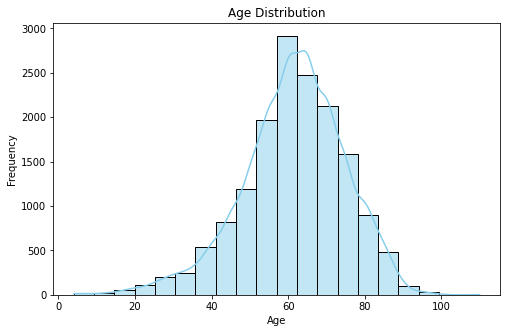

In [13]:
# Distribution of age
plt.figure(figsize=(8, 5))
sns.histplot(data['AGE'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

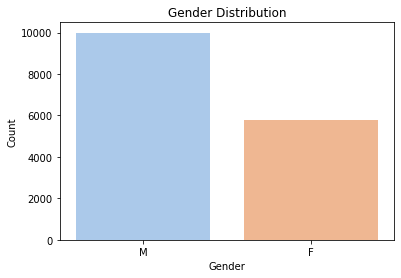

In [14]:
# Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='GENDER', data=data, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

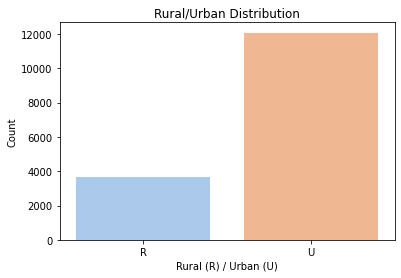

In [15]:

# Rural/Urban distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='RURAL', data=data, palette='pastel')
plt.title('Rural/Urban Distribution')
plt.xlabel('Rural (R) / Urban (U)')
plt.ylabel('Count')
plt.show()

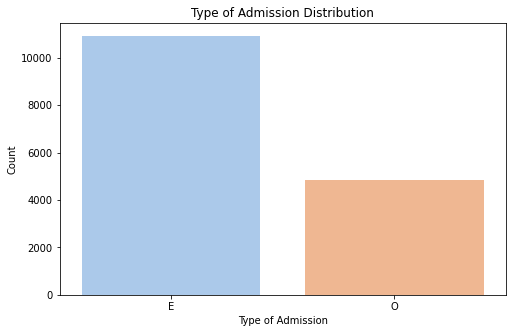

In [16]:

# Types of admission
plt.figure(figsize=(8, 5))
sns.countplot(x='TYPE OF ADMISSION-EMERGENCY/OPD', data=data, palette='pastel')
plt.title('Type of Admission Distribution')
plt.xlabel('Type of Admission')
plt.ylabel('Count')
plt.show()

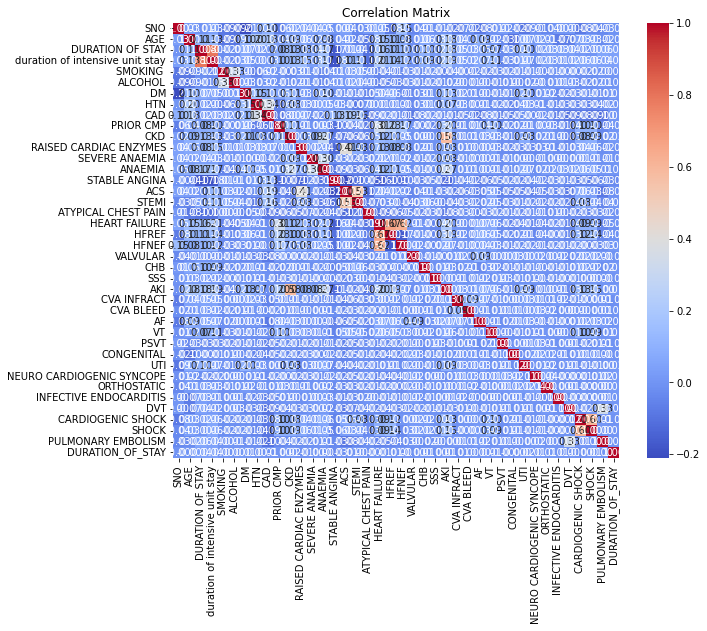

In [17]:
# Correlation heatmap for numerical columns
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [18]:


# Top 5 conditions in the dataset (if applicable)
condition_columns = ['CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC', 'INFECTIVE ENDOCARDITIS', 
                     'DVT', 'CARDIOGENIC SHOCK', 'SHOCK', 'PULMONARY EMBOLISM', 'CHEST INFECTION']


In [19]:
data[condition_columns]

,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
15752,0,0,0,0,0,0,0,0,0,0
15753,0,0,0,0,0,0,0,0,0,0
15754,0,0,0,0,0,0,0,0,0,0
15755,0,0,0,0,0,0,0,0,0,0


In [20]:
data[condition_columns].isnull().sum()

CONGENITAL                   0
UTI                          0
NEURO CARDIOGENIC SYNCOPE    0
ORTHOSTATIC                  0
INFECTIVE ENDOCARDITIS       0
DVT                          0
CARDIOGENIC SHOCK            0
SHOCK                        0
PULMONARY EMBOLISM           0
CHEST INFECTION              0
dtype: int64

In [21]:
data[condition_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15757 entries, 0 to 15756
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   CONGENITAL                 15757 non-null  int64 
 1   UTI                        15757 non-null  int64 
 2   NEURO CARDIOGENIC SYNCOPE  15757 non-null  int64 
 3   ORTHOSTATIC                15757 non-null  int64 
 4   INFECTIVE ENDOCARDITIS     15757 non-null  int64 
 5   DVT                        15757 non-null  int64 
 6   CARDIOGENIC SHOCK          15757 non-null  int64 
 7   SHOCK                      15757 non-null  int64 
 8   PULMONARY EMBOLISM         15757 non-null  int64 
 9   CHEST INFECTION            15757 non-null  object
dtypes: int64(9), object(1)
memory usage: 1.2+ MB


In [22]:
print(data['CHEST INFECTION'].unique())

['0' '1' '\\']


In [23]:
data['CHEST INFECTION'].value_counts()

0    15415
1      341
\        1
Name: CHEST INFECTION, dtype: int64

In [24]:
data['CHEST INFECTION'].replace({"\\":'0'},inplace=True)

In [25]:
data['CHEST INFECTION'].value_counts()

0    15416
1      341
Name: CHEST INFECTION, dtype: int64

In [26]:
data['CHEST INFECTION'] = data['CHEST INFECTION'].astype(int)

In [27]:
top_conditions = data[condition_columns].sum().sort_values(ascending=False)




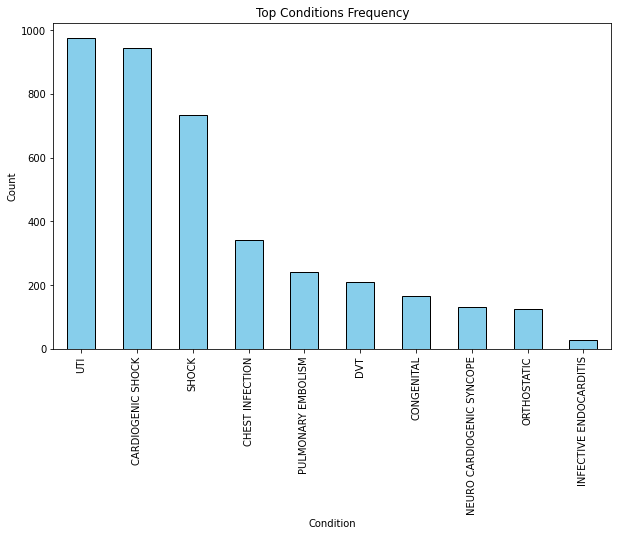

In [28]:
plt.figure(figsize=(10, 6))
top_conditions.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top Conditions Frequency')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

In [29]:
# Check for duplicate rows in the dataset
duplicate_rows = data[data.duplicated()]

# Display duplicate rows
print(f"Total number of duplicate rows: {len(duplicate_rows)}")
print(duplicate_rows)

Total number of duplicate rows: 0
Empty DataFrame
Columns: [SNO, MRD No., D.O.A, D.O.D, AGE, GENDER, RURAL, TYPE OF ADMISSION-EMERGENCY/OPD, month year, DURATION OF STAY, duration of intensive unit stay, OUTCOME, SMOKING , ALCOHOL, DM, HTN, CAD, PRIOR CMP, CKD, HB, TLC, PLATELETS, GLUCOSE, UREA, CREATININE, BNP, RAISED CARDIAC ENZYMES, EF, SEVERE ANAEMIA, ANAEMIA, STABLE ANGINA, ACS, STEMI, ATYPICAL CHEST PAIN, HEART FAILURE, HFREF, HFNEF, VALVULAR, CHB, SSS, AKI, CVA INFRACT, CVA BLEED, AF, VT, PSVT, CONGENITAL, UTI, NEURO CARDIOGENIC SYNCOPE, ORTHOSTATIC, INFECTIVE ENDOCARDITIS, DVT, CARDIOGENIC SHOCK, SHOCK, PULMONARY EMBOLISM, CHEST INFECTION, DURATION_OF_STAY]
Index: []

[0 rows x 57 columns]


In [30]:
import pandas as pd

# Extract the month from 'month year' column and create a new 'month' column
data['month'] = data['month year'].str[:3]  # Extracts the first three letters (e.g., 'Apr', 'May')

# Group by the 'month' and sum each disease count across all years
monthly_aggregated_counts = data.groupby('month')[disease_columns].sum()

# Reorder the months (Optional, for better readability)
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_aggregated_counts = monthly_aggregated_counts.reindex(month_order)

# Display the result
print("Total count of each disease for every month (aggregated across all years):")
print(monthly_aggregated_counts)

Total count of each disease for every month (aggregated across all years):
        DM  HTN   CAD  PRIOR CMP  CKD  RAISED CARDIAC ENZYMES  SEVERE ANAEMIA  \
month                                                                           
Jan    539  799  1206        269  198                     354              37   
Feb    374  734  1039        222  157                     250              31   
Mar    362  690   962        207  132                     245              17   
Apr    343  488   639        187   67                     180              12   
May    493  614   809        225  117                     185              12   
Jun    491  616   786        240  111                     214              17   
Jul    404  549   760        183  115                     197              26   
Aug    354  506   733        151  122                     189              23   
Sep    352  578   800        190   97                     228              23   
Oct    340  599   848        175  

In [31]:
dataframe=data
dataframe

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,...,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION,DURATION_OF_STAY,month
0,1,234735,2017-04-01,2017-04-03,81,M,R,E,Apr-17,3,...,0,0,0,0,0,0,0,0,2.0,Apr
1,2,234696,2017-04-01,2017-04-05,65,M,R,E,Apr-17,5,...,0,0,0,0,0,0,0,0,4.0,Apr
2,3,234882,2017-04-01,2017-04-03,53,M,U,E,Apr-17,3,...,0,0,0,0,0,0,0,0,2.0,Apr
3,4,234635,2017-04-01,2017-04-08,67,F,U,E,Apr-17,8,...,0,0,0,0,0,0,0,0,7.0,Apr
4,5,234486,2017-04-01,2017-04-23,60,F,U,E,Apr-17,23,...,0,0,0,0,0,0,0,0,22.0,Apr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,15753,699585,2019-03-31,2019-04-04,86,F,U,O,Mar-19,5,...,0,0,0,0,0,0,0,0,4.0,Mar
15753,15754,699500,2019-03-31,2019-04-01,50,M,R,E,Mar-19,2,...,0,0,0,0,0,0,0,0,1.0,Mar
15754,15755,700415,2019-03-31,2019-09-04,82,M,U,E,Mar-19,10,...,0,0,0,0,0,0,0,0,157.0,Mar
15755,15756,699524,2019-03-31,2019-03-04,59,F,U,O,Mar-19,4,...,0,0,0,0,0,0,0,0,-27.0,Mar


In [32]:
dataframe['HB']=dataframe['HB'].fillna(dataframe['HB'].mode()[0])

In [33]:
dataframe['TLC']=dataframe['TLC'].fillna(dataframe['TLC'].mode()[0])

In [34]:
dataframe['PLATELETS']=dataframe['PLATELETS'].fillna(dataframe['PLATELETS'].mode()[0])

In [35]:
dataframe['GLUCOSE']=dataframe['GLUCOSE'].fillna(dataframe['GLUCOSE'].mode()[0])

In [36]:
dataframe['UREA']=dataframe['UREA'].fillna(dataframe['UREA'].mode()[0])

In [37]:
dataframe['CREATININE']=dataframe['CREATININE'].fillna(dataframe['CREATININE'].mode()[0])

In [38]:
dataframe['BNP']=dataframe['BNP'].fillna(dataframe['BNP'].mode()[0])

In [39]:
dataframe['EF']=dataframe['EF'].fillna(dataframe['EF'].mode()[0])

In [40]:
dataframe.isnull().sum()

SNO                                0
MRD No.                            0
D.O.A                              0
D.O.D                              1
AGE                                0
GENDER                             0
RURAL                              0
TYPE OF ADMISSION-EMERGENCY/OPD    0
month year                         0
DURATION OF STAY                   0
duration of intensive unit stay    0
OUTCOME                            0
SMOKING                            0
ALCOHOL                            0
DM                                 0
HTN                                0
CAD                                0
PRIOR CMP                          0
CKD                                0
HB                                 0
TLC                                0
PLATELETS                          0
GLUCOSE                            0
UREA                               0
CREATININE                         0
BNP                                0
RAISED CARDIAC ENZYMES             0
E

In [41]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15757 entries, 0 to 15756
Data columns (total 58 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   SNO                              15757 non-null  int64         
 1   MRD No.                          15757 non-null  object        
 2   D.O.A                            15757 non-null  datetime64[ns]
 3   D.O.D                            15756 non-null  datetime64[ns]
 4   AGE                              15757 non-null  int64         
 5   GENDER                           15757 non-null  object        
 6   RURAL                            15757 non-null  object        
 7   TYPE OF ADMISSION-EMERGENCY/OPD  15757 non-null  object        
 8   month year                       15757 non-null  object        
 9   DURATION OF STAY                 15757 non-null  int64         
 10  duration of intensive unit stay  15757 non-null  int64    

In [42]:
from scipy.stats import uniform
from sklearn import linear_model
from sklearn.utils import resample
from scipy.stats import loguniform
from sklearn.metrics import f1_score

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import scale

from sklearn.metrics import recall_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import ElasticNet
from sklearn.metrics import precision_score
from scipy.stats import median_abs_deviation
from sklearn.metrics import confusion_matrix

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import RepeatedStratifiedKFold


In [43]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [44]:
#use pipeline to scale numeric features and encode categorical features
numeric_features = ['AGE','duration of intensive unit stay','SMOKING ', 'ALCOHOL', 'DM', 'HTN', 'CAD', 
                    'PRIOR CMP', 'CKD', 'HB', 'TLC', 'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE', 'BNP',
                    'RAISED CARDIAC ENZYMES', 'EF', 'SEVERE ANAEMIA', 'ANAEMIA',
                    'STABLE ANGINA', 'ACS', 'STEMI', 'ATYPICAL CHEST PAIN', 'HEART FAILURE',
                    'HFREF', 'HFNEF', 'VALVULAR', 'CHB', 'SSS', 'AKI', 'CVA INFRACT',
                    'CVA BLEED', 'AF', 'VT', 'PSVT', 'CONGENITAL', 'UTI',
                    'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC', 'INFECTIVE ENDOCARDITIS',
                    'DVT', 'CARDIOGENIC SHOCK', 'SHOCK', 'PULMONARY EMBOLISM']
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())])

categorical_features = ['GENDER', 'RURAL', 'TYPE OF ADMISSION-EMERGENCY/OPD',
                    'OUTCOME', 'CHEST INFECTION','lengthofstay']
categorical_transformer = OneHotEncoder(handle_unknown="ignore")
#cat_encoded = categorical_transformer.fit_transform(dataframe[['GENDER', 'RURAL', 'TYPE OF ADMISSION-EMERGENCY/OPD','OUTCOME', 'CHEST INFECTION']])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [45]:
dataframe

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,...,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION,DURATION_OF_STAY,month
0,1,234735,2017-04-01,2017-04-03,81,M,R,E,Apr-17,3,...,0,0,0,0,0,0,0,0,2.0,Apr
1,2,234696,2017-04-01,2017-04-05,65,M,R,E,Apr-17,5,...,0,0,0,0,0,0,0,0,4.0,Apr
2,3,234882,2017-04-01,2017-04-03,53,M,U,E,Apr-17,3,...,0,0,0,0,0,0,0,0,2.0,Apr
3,4,234635,2017-04-01,2017-04-08,67,F,U,E,Apr-17,8,...,0,0,0,0,0,0,0,0,7.0,Apr
4,5,234486,2017-04-01,2017-04-23,60,F,U,E,Apr-17,23,...,0,0,0,0,0,0,0,0,22.0,Apr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,15753,699585,2019-03-31,2019-04-04,86,F,U,O,Mar-19,5,...,0,0,0,0,0,0,0,0,4.0,Mar
15753,15754,699500,2019-03-31,2019-04-01,50,M,R,E,Mar-19,2,...,0,0,0,0,0,0,0,0,1.0,Mar
15754,15755,700415,2019-03-31,2019-09-04,82,M,U,E,Mar-19,10,...,0,0,0,0,0,0,0,0,157.0,Mar
15755,15756,699524,2019-03-31,2019-03-04,59,F,U,O,Mar-19,4,...,0,0,0,0,0,0,0,0,-27.0,Mar


In [46]:
dataframe.columns

Index(['SNO', 'MRD No.', 'D.O.A', 'D.O.D', 'AGE', 'GENDER', 'RURAL',
       'TYPE OF ADMISSION-EMERGENCY/OPD', 'month year', 'DURATION OF STAY',
       'duration of intensive unit stay', 'OUTCOME', 'SMOKING ', 'ALCOHOL',
       'DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD', 'HB', 'TLC', 'PLATELETS',
       'GLUCOSE', 'UREA', 'CREATININE', 'BNP', 'RAISED CARDIAC ENZYMES', 'EF',
       'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA', 'ACS', 'STEMI',
       'ATYPICAL CHEST PAIN', 'HEART FAILURE', 'HFREF', 'HFNEF', 'VALVULAR',
       'CHB', 'SSS', 'AKI', 'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT',
       'CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC',
       'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK', 'SHOCK',
       'PULMONARY EMBOLISM', 'CHEST INFECTION', 'DURATION_OF_STAY', 'month'],
      dtype='object')

In [47]:
disease_columns

['DM',
 'HTN',
 'CAD',
 'PRIOR CMP',
 'CKD',
 'RAISED CARDIAC ENZYMES',
 'SEVERE ANAEMIA',
 'ANAEMIA',
 'STABLE ANGINA',
 'ACS',
 'STEMI',
 'ATYPICAL CHEST PAIN',
 'HEART FAILURE',
 'HFREF',
 'HFNEF',
 'VALVULAR',
 'CHB',
 'SSS',
 'AKI',
 'CVA INFRACT',
 'CVA BLEED',
 'AF',
 'VT',
 'PSVT',
 'CONGENITAL',
 'UTI',
 'NEURO CARDIOGENIC SYNCOPE',
 'ORTHOSTATIC',
 'INFECTIVE ENDOCARDITIS',
 'DVT',
 'CARDIOGENIC SHOCK',
 'SHOCK',
 'PULMONARY EMBOLISM',
 'CHEST INFECTION']

In [48]:
selected_features=[]
selected_features=disease_columns


In [49]:
selected_features

['DM',
 'HTN',
 'CAD',
 'PRIOR CMP',
 'CKD',
 'RAISED CARDIAC ENZYMES',
 'SEVERE ANAEMIA',
 'ANAEMIA',
 'STABLE ANGINA',
 'ACS',
 'STEMI',
 'ATYPICAL CHEST PAIN',
 'HEART FAILURE',
 'HFREF',
 'HFNEF',
 'VALVULAR',
 'CHB',
 'SSS',
 'AKI',
 'CVA INFRACT',
 'CVA BLEED',
 'AF',
 'VT',
 'PSVT',
 'CONGENITAL',
 'UTI',
 'NEURO CARDIOGENIC SYNCOPE',
 'ORTHOSTATIC',
 'INFECTIVE ENDOCARDITIS',
 'DVT',
 'CARDIOGENIC SHOCK',
 'SHOCK',
 'PULMONARY EMBOLISM',
 'CHEST INFECTION']

In [50]:
selected_features.append('month')

In [51]:
dataframe1=dataframe[selected_features]

In [52]:
dataframe1

,DM,HTN,CAD,PRIOR CMP,CKD,RAISED CARDIAC ENZYMES,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,ACS,...,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION,month
0,1,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,Apr
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Apr
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Apr
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Apr
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Apr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,1,1,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,Mar
15753,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Mar
15754,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Mar
15755,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Mar


In [53]:
dataframe1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15757 entries, 0 to 15756
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   DM                         15757 non-null  int64 
 1   HTN                        15757 non-null  int64 
 2   CAD                        15757 non-null  int64 
 3   PRIOR CMP                  15757 non-null  int64 
 4   CKD                        15757 non-null  int64 
 5   RAISED CARDIAC ENZYMES     15757 non-null  int64 
 6   SEVERE ANAEMIA             15757 non-null  int64 
 7   ANAEMIA                    15757 non-null  int64 
 8   STABLE ANGINA              15757 non-null  int64 
 9   ACS                        15757 non-null  int64 
 10  STEMI                      15757 non-null  int64 
 11  ATYPICAL CHEST PAIN        15757 non-null  int64 
 12  HEART FAILURE              15757 non-null  int64 
 13  HFREF                      15757 non-null  int64 
 14  HFNEF 

In [54]:
dataframe1

,DM,HTN,CAD,PRIOR CMP,CKD,RAISED CARDIAC ENZYMES,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,ACS,...,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION,month
0,1,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,Apr
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Apr
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Apr
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Apr
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Apr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,1,1,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,Mar
15753,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Mar
15754,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Mar
15755,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Mar


In [55]:
dataframe1['month'].replace({'Jan':1,'Feb':2,'Mar':3,'Apr':4,"May":5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12},inplace=True)



In [56]:
dataframe1

,DM,HTN,CAD,PRIOR CMP,CKD,RAISED CARDIAC ENZYMES,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,ACS,...,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION,month
0,1,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,4
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,1,1,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,3
15753,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
15754,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3
15755,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [57]:
dataframe1['month'].value_counts()

1     1643
12    1542
11    1468
2     1432
10    1359
3     1355
9     1262
6     1194
5     1185
7     1176
8     1145
4      996
Name: month, dtype: int64

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

In [59]:
data=dataframe1
# Assuming `data` is the DataFrame you've provided

# Step 1: Data Preprocessing
# Handling missing values (if any) - assuming data is clean already
data.fillna(0, inplace=True)

# Step 2: Feature and Target Selection
# We'll predict each disease one by one
disease_columns = ['DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD', 'RAISED CARDIAC ENZYMES', 
                   'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA', 'ACS', 
                   'STEMI', 'HEART FAILURE', 'HFREF', 'HFNEF', 'VALVULAR', 
                   'CHB', 'SSS', 'AKI', 'CVA INFRACT', 'CVA BLEED', 'AF', 
                   'VT', 'PSVT', 'CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE', 
                   'ORTHOSTATIC', 'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK', 
                   'SHOCK', 'PULMONARY EMBOLISM', 'CHEST INFECTION']

# Example for predicting 'DM' (Diabetes Mellitus)
target = 'DM'

# Prepare feature matrix (X) and target vector (y)
X = data.drop(columns=['month', target])
y = data[target]

# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Choose a model (Linear Regression or RandomForest)
# Example: Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 5: Train the model
model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')

# Step 7: Make predictions
# Predicting the number of DM cases in future months (e.g., for month 5)
future_month_data = data[data['month'] == 5].drop(columns=['month', target])
predictions = model.predict(future_month_data)

# Print predictions
print(f'Predictions for DM cases in month 5: {predictions}')


Mean Absolute Error (MAE): 0.3958307407615131
Mean Squared Error (MSE): 0.2171738780513182
Predictions for DM cases in month 5: [0.15982092 0.28682188 0.15982092 ... 0.32772735 0.2577664  0.07666265]


In [60]:
len(predictions)

1185

In [61]:
# Loop over all diseases and predict
predictions_dict = {}
for target in disease_columns:
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f'{target} - MAE: {mae}, MSE: {mse}')
    
    # Predict for a future month
    future_month_data = data[data['month'] == 5].drop(columns=['month', target])
    predictions_dict[target] = model.predict(future_month_data)
    
print(predictions_dict)


DM - MAE: 0.3958307407615131, MSE: 0.2171738780513182
HTN - MAE: 0.0, MSE: 0.0
CAD - MAE: 0.0, MSE: 0.0
PRIOR CMP - MAE: 0.0, MSE: 0.0
CKD - MAE: 0.0, MSE: 0.0
RAISED CARDIAC ENZYMES - MAE: 0.0, MSE: 0.0
SEVERE ANAEMIA - MAE: 0.0, MSE: 0.0
ANAEMIA - MAE: 0.0, MSE: 0.0
STABLE ANGINA - MAE: 0.0, MSE: 0.0
ACS - MAE: 0.0, MSE: 0.0
STEMI - MAE: 0.0, MSE: 0.0
HEART FAILURE - MAE: 0.0, MSE: 0.0
HFREF - MAE: 0.0, MSE: 0.0
HFNEF - MAE: 0.0, MSE: 0.0
VALVULAR - MAE: 0.0, MSE: 0.0
CHB - MAE: 0.0, MSE: 0.0
SSS - MAE: 0.0, MSE: 0.0
AKI - MAE: 0.0, MSE: 0.0
CVA INFRACT - MAE: 0.0, MSE: 0.0
CVA BLEED - MAE: 0.0, MSE: 0.0
AF - MAE: 0.0, MSE: 0.0
VT - MAE: 0.0, MSE: 0.0
PSVT - MAE: 0.0, MSE: 0.0
CONGENITAL - MAE: 0.0, MSE: 0.0
UTI - MAE: 0.0, MSE: 0.0
NEURO CARDIOGENIC SYNCOPE - MAE: 0.0, MSE: 0.0
ORTHOSTATIC - MAE: 0.0, MSE: 0.0
INFECTIVE ENDOCARDITIS - MAE: 0.0, MSE: 0.0
DVT - MAE: 0.0, MSE: 0.0
CARDIOGENIC SHOCK - MAE: 0.0, MSE: 0.0
SHOCK - MAE: 0.0, MSE: 0.0
PULMONARY EMBOLISM - MAE: 0.0, MSE: 0.0


In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming `data` is your DataFrame

# Step 1: Data Preprocessing (Handle missing values)
data.fillna(0, inplace=True)

# Step 2: Choose the disease for prediction (e.g., 'DM')
target = 'DM'

# Step 3: Prepare features (X) and target (y)
# We'll predict for one disease in a specific month
X = data.drop(columns=[target])  # All columns except the target disease
y = data[target]  # Target column ('DM' in this case)

# Step 4: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Evaluate the model (optional but good for checking accuracy)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')

# Step 7: Predict cases for a specific month (e.g., month 4)
# We filter the data to get features corresponding to month 4
month = 4
future_month_data = data[data['month'] == month].drop(columns=[target])  # Keep 'month' and other features
predictions = model.predict(future_month_data)

# Step 8: Display the predicted number of cases for the disease (e.g., DM) in month 4
print(f'Predicted number of DM cases in month {month}: {predictions.sum()}')


Mean Absolute Error (MAE): 0.38830585513167126
Mean Squared Error (MSE): 0.22096977977256516
Predicted number of DM cases in month 4: 325.006238236268


In [63]:
def predict_cases(disease,month):
    print('Predicting Number of Cases of Disease ',disease,'in Month ',month)
    
    X = data.drop(columns=[disease])  # All columns except the target disease
    y = data[disease]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Mean Squared Error (MSE): {mse}')
    
    future_month_data = data[data['month'] == month].drop(columns=[target]) 
    predictions = model.predict(future_month_data)
    rounded_value = round(predictions.sum())
    print(f'Predicted number of {disease} cases in month {month}: {rounded_value}')
    
    return rounded_value

In [64]:
predict_cases('PULMONARY EMBOLISM',2)

Predicting Number of Cases of Disease  PULMONARY EMBOLISM in Month  2
Mean Absolute Error (MAE): 0.026463829664839927
Mean Squared Error (MSE): 0.012871025964149189
Predicted number of PULMONARY EMBOLISM cases in month 2: 53


53

In [65]:
predict_cases('HFREF',2)

Predicting Number of Cases of Disease  HFREF in Month  2
Mean Absolute Error (MAE): 0.0024205985823609563
Mean Squared Error (MSE): 0.000922408186987493
Predicted number of HFREF cases in month 2: 272


272

In [66]:
predict_cases('HEART FAILURE',2)

Predicting Number of Cases of Disease  HEART FAILURE in Month  2
Mean Absolute Error (MAE): 0.0018912779938334082
Mean Squared Error (MSE): 0.001009518242391909
Predicted number of HEART FAILURE cases in month 2: 503


503

In [67]:
predict_cases('HEART FAILURE',12)

Predicting Number of Cases of Disease  HEART FAILURE in Month  12
Mean Absolute Error (MAE): 0.0018912779938334082
Mean Squared Error (MSE): 0.001009518242391909
Predicted number of HEART FAILURE cases in month 12: 509


509

In [68]:
predict_cases('HEART FAILURE',6)

Predicting Number of Cases of Disease  HEART FAILURE in Month  6
Mean Absolute Error (MAE): 0.0018912779938334082
Mean Squared Error (MSE): 0.001009518242391909
Predicted number of HEART FAILURE cases in month 6: 322


322

In [69]:
disease_columns

['DM',
 'HTN',
 'CAD',
 'PRIOR CMP',
 'CKD',
 'RAISED CARDIAC ENZYMES',
 'SEVERE ANAEMIA',
 'ANAEMIA',
 'STABLE ANGINA',
 'ACS',
 'STEMI',
 'HEART FAILURE',
 'HFREF',
 'HFNEF',
 'VALVULAR',
 'CHB',
 'SSS',
 'AKI',
 'CVA INFRACT',
 'CVA BLEED',
 'AF',
 'VT',
 'PSVT',
 'CONGENITAL',
 'UTI',
 'NEURO CARDIOGENIC SYNCOPE',
 'ORTHOSTATIC',
 'INFECTIVE ENDOCARDITIS',
 'DVT',
 'CARDIOGENIC SHOCK',
 'SHOCK',
 'PULMONARY EMBOLISM',
 'CHEST INFECTION']

In [70]:
month = 4
d={}
for disease in disease_columns:
    cases=predict_cases(disease,month)
    d[disease]=cases
    print('**************************************************************')
    
    

Predicting Number of Cases of Disease  DM in Month  4
Mean Absolute Error (MAE): 0.38830585513167126
Mean Squared Error (MSE): 0.22096977977256516
Predicted number of DM cases in month 4: 325
**************************************************************
Predicting Number of Cases of Disease  HTN in Month  4
Mean Absolute Error (MAE): 0.3942028108904685
Mean Squared Error (MSE): 0.22407573607209788
Predicted number of HTN cases in month 4: 494
**************************************************************
Predicting Number of Cases of Disease  CAD in Month  4
Mean Absolute Error (MAE): 0.3140210192719554
Mean Squared Error (MSE): 0.1829800826024469
Predicted number of CAD cases in month 4: 665
**************************************************************
Predicting Number of Cases of Disease  PRIOR CMP in Month  4
Mean Absolute Error (MAE): 0.20597725868396627
Mean Squared Error (MSE): 0.11934503308175115
Predicted number of PRIOR CMP cases in month 4: 214
****************************

Mean Absolute Error (MAE): 0.026463829664839927
Mean Squared Error (MSE): 0.012871025964149189
Predicted number of PULMONARY EMBOLISM cases in month 4: 38
**************************************************************
Predicting Number of Cases of Disease  CHEST INFECTION in Month  4
Mean Absolute Error (MAE): 0.04777636877621404
Mean Squared Error (MSE): 0.026021217181280032
Predicted number of CHEST INFECTION cases in month 4: 13
**************************************************************


In [71]:
d

{'DM': 325,
 'HTN': 494,
 'CAD': 665,
 'PRIOR CMP': 214,
 'CKD': 81,
 'RAISED CARDIAC ENZYMES': 179,
 'SEVERE ANAEMIA': 19,
 'ANAEMIA': 256,
 'STABLE ANGINA': 69,
 'ACS': 256,
 'STEMI': 77,
 'HEART FAILURE': 225,
 'HFREF': 121,
 'HFNEF': 122,
 'VALVULAR': 97,
 'CHB': 37,
 'SSS': 3,
 'AKI': 315,
 'CVA INFRACT': 116,
 'CVA BLEED': 15,
 'AF': 124,
 'VT': 64,
 'PSVT': 9,
 'CONGENITAL': 33,
 'UTI': 132,
 'NEURO CARDIOGENIC SYNCOPE': 9,
 'ORTHOSTATIC': 28,
 'INFECTIVE ENDOCARDITIS': 6,
 'DVT': 70,
 'CARDIOGENIC SHOCK': 74,
 'SHOCK': 79,
 'PULMONARY EMBOLISM': 38,
 'CHEST INFECTION': 13}

In [72]:
top_5_values = sorted(d.items(), key=lambda x: x[1], reverse=True)[:5]

print(top_5_values)

[('CAD', 665), ('HTN', 494), ('DM', 325), ('AKI', 315), ('ANAEMIA', 256)]


In [73]:
month = 8
d={}
for disease in disease_columns:
    cases=predict_cases(disease,month)
    d[disease]=cases
    print('**************************************************************')
    
    

Predicting Number of Cases of Disease  DM in Month  8
Mean Absolute Error (MAE): 0.38830585513167126
Mean Squared Error (MSE): 0.22096977977256516
Predicted number of DM cases in month 8: 357
**************************************************************
Predicting Number of Cases of Disease  HTN in Month  8
Mean Absolute Error (MAE): 0.3942028108904685
Mean Squared Error (MSE): 0.22407573607209788
Predicted number of HTN cases in month 8: 536
**************************************************************
Predicting Number of Cases of Disease  CAD in Month  8
Mean Absolute Error (MAE): 0.3140210192719554
Mean Squared Error (MSE): 0.1829800826024469
Predicted number of CAD cases in month 8: 741
**************************************************************
Predicting Number of Cases of Disease  PRIOR CMP in Month  8
Mean Absolute Error (MAE): 0.20597725868396627
Mean Squared Error (MSE): 0.11934503308175115
Predicted number of PRIOR CMP cases in month 8: 187
****************************

Mean Absolute Error (MAE): 0.026463829664839927
Mean Squared Error (MSE): 0.012871025964149189
Predicted number of PULMONARY EMBOLISM cases in month 8: 107
**************************************************************
Predicting Number of Cases of Disease  CHEST INFECTION in Month  8
Mean Absolute Error (MAE): 0.04777636877621404
Mean Squared Error (MSE): 0.026021217181280032
Predicted number of CHEST INFECTION cases in month 8: 47
**************************************************************


In [74]:
d

{'DM': 357,
 'HTN': 536,
 'CAD': 741,
 'PRIOR CMP': 187,
 'CKD': 126,
 'RAISED CARDIAC ENZYMES': 189,
 'SEVERE ANAEMIA': 32,
 'ANAEMIA': 383,
 'STABLE ANGINA': 35,
 'ACS': 299,
 'STEMI': 91,
 'HEART FAILURE': 328,
 'HFREF': 170,
 'HFNEF': 171,
 'VALVULAR': 64,
 'CHB': 43,
 'SSS': 25,
 'AKI': 341,
 'CVA INFRACT': 63,
 'CVA BLEED': 18,
 'AF': 204,
 'VT': 44,
 'PSVT': 64,
 'CONGENITAL': 40,
 'UTI': 135,
 'NEURO CARDIOGENIC SYNCOPE': 8,
 'ORTHOSTATIC': 4,
 'INFECTIVE ENDOCARDITIS': 7,
 'DVT': 22,
 'CARDIOGENIC SHOCK': 97,
 'SHOCK': 51,
 'PULMONARY EMBOLISM': 107,
 'CHEST INFECTION': 47}

In [75]:
top_5_values = sorted(d.items(), key=lambda x: x[1], reverse=True)[:5]

print(top_5_values)

[('CAD', 741), ('HTN', 536), ('ANAEMIA', 383), ('DM', 357), ('AKI', 341)]
